# Tarea 3 - Pregunta 2 - Bike Sharing: Predicción de Demanda Horaria
---
# Matías Araya - 201173082-8
# Claudia Hazard - 201404523-9
---

El objetivo de esta sección es predecir la demanda de bicicletas sobre la red de *Capital Bikeshare* de la ciudad de Washington. Todo esto en función de la hora del día y otras variables.

## Objetivo

Entrenar un modelo para obtener un puntaje correspondiente al top-100 del leaderboard final de la competencia de *Bike Sharing Demand de Kaggle*, es decir superior o igual a $0.37748$. Para esto se utiliza la siguiente función de error:

$$E_{bikes} (y, \hat{y}) = \frac{1}{n} \sum_{i} (ln(y_i + 1) - ln(\hat{y_i} + 1))^2 $$

Donde $y$, $\hat{y}$ $\in R^{n}$ denotan los vectores de observaciones y predicciones respectivamente.

## a)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
ntest = len(dftest)
print "Numero de datos de entrenamiento: ", ntrain
print "Numero de datos de validacion: ", nval-ntrain
print "Numero de datos de prueba: ", ntest
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print df.info()
print "-"*80
print "Descripcion de las variables\n"
print df.describe()
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

Numero de datos de entrenamiento:  6562
Numero de datos de validacion:  2177
Numero de datos de prueba:  2147

Summary - dataframe completo:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2146
Data columns (total 13 columns):
Unnamed: 0    10886 non-null int64
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.2+ MB
None
--------------------------------------------------------------------------------
Descripcion de las variables

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.0000

Características más importantes del dataset:

    Numero de datos de entrenamiento: 6562
    Numero de datos de validación: 2177
    Numero de datos de prueba: 2147
    Número total de datos: 10886

Variables

1. **datetime**: Hora y marca temporal. Tipo String.
2. **season**: Temporada del año. Valores posibles: 1,2,3,4. Tipo: Entero.
3. **holiday**: Si el día es considerado vacaciones. Valores: 0,1. Tipo: Entero.
4. **workingday**: Si el día no es fin de semana o vacaciones. Valores: 0,1. Tipo: Entero.
5. **wheater**: Clima (Valores discretos). Valores: 1, 2, 3, 4. Tipo: Entero.
6. **temp**: Temperatura en grados Celsius. Valores: Continuos. Tipo: Flotante.
7. **atemp**: Sensación térmica. Valores: Continuos. Tipo: Flotante.
8. **humidity**: Humedad relativa. Valores: Discretos. Tipo: Entero.
9. **windspeed**: Velocidad del viento. Valores: Continuos. Tipo: Flotante.
10. **casual**: Numero de rentas de usuarios no registrados iniciadas. Valores: Discretos. Tipo: Entero.
11. **registered**: Numero de rentas de usuarios registrados iniciadas. Valores: Discretos. Tipo: Entero.
12. **count**: Numero de rentas totales. Valores: Discretos. Tipo: Entero.

A partir de la descripción del dataset, se puede notar que los valores son muy dispares de una variable a otra, ya que se presentan escalas distintas. Algunos valores son discretos y otros continuos, y en general las desviaciones típicas son muy distintas entre los atributos. Una buena idea en este sentido, seria normalizar los datos para no generar conflictos en los algoritmos de aprendizaje. Notar que la variable objetivo *count* es la suma de *casual* y *registered*

Además, se muestran los histogramas de los atributos anteriores. Notar que el nuevo atributo "hour" corresponde a la hora del día obtenida del atributo datetime y es de tipo entero.

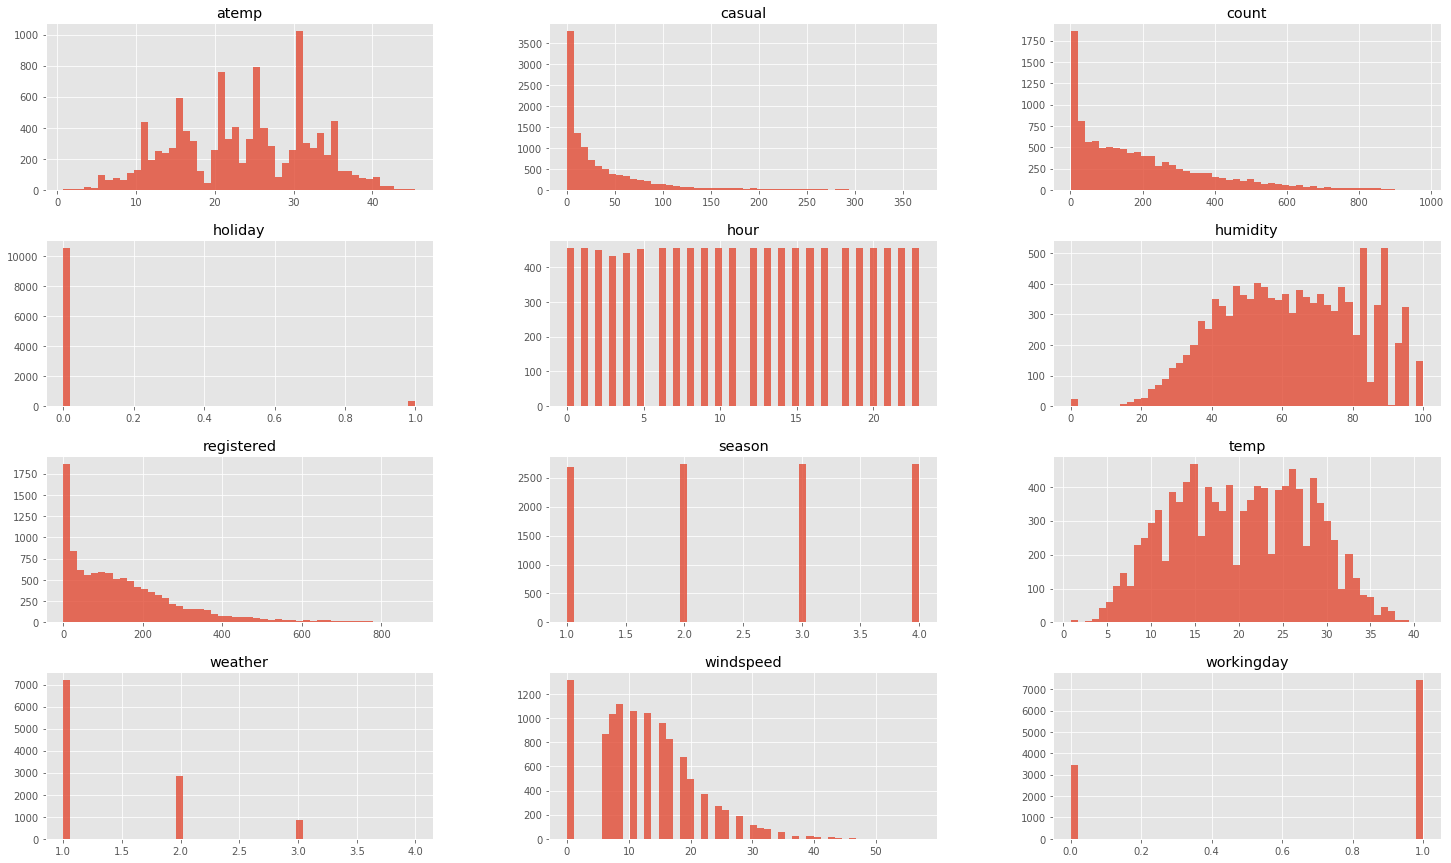

In [6]:
df.iloc[:,1:].hist(figsize=(25, 15),alpha=0.8, bins=50)
plt.show()

Hay que notar que la variable objetivo *count* tiene un sesgo importante hacia la derecha, esto quiere decir que la cantidad de bicicletas que se suelen arrendar en un cierto momento son pocas, es raro que alguien arriende muchas bicicletas en determinado momento.

Se puede nota